Recordar consultar el [Diccionario de datos](./Datasets/Google%20Maps/Diccionario%20de%20datos.docx)


# Importaciones

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import geopy


# Llamado de datos a dataframes

In [3]:
df_maps_restaurantes = pd.read_parquet(r'Generated\Google\metada_sitios.parquet')
df_maps_reviews = pd.read_parquet(r'Generated\Google\merge_site_reviews.parquet')
df_yelp_restaurantes = pd.read_parquet(r'Generated\Yelp\bussines.parquet')
df_yelp_checkin = pd.read_parquet(r'Generated\YELP\business_checkin.parquet')
df_yelp_tips = pd.read_parquet(r'Generated\Yelp\business_tip.parquet')
df_yelp_reviews = pd.read_parquet(r'Generated\Yelp\review.parquet')
df_yelp_users = pd.read_parquet(r'Generated\Yelp\users_extracted.parquet')

In [4]:
df_maps_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212014 entries, 0 to 212013
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              212014 non-null  object 
 1   address           210956 non-null  object 
 2   gmap_id           212014 non-null  object 
 3   description       72392 non-null   object 
 4   latitude          212014 non-null  float64
 5   longitude         212014 non-null  float64
 6   category          212014 non-null  object 
 7   avg_rating        212014 non-null  float64
 8   num_of_reviews    212014 non-null  int64  
 9   price             100000 non-null  object 
 10  hours             189913 non-null  object 
 11  MISC              210599 non-null  object 
 12  state             190751 non-null  object 
 13  relative_results  170957 non-null  object 
 14  url               212014 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 24.3+ MB


In [5]:
df_maps_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877474 entries, 0 to 1877473
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   name_x            object 
 2   time              int64  
 3   rating            int64  
 4   text              object 
 5   pics              object 
 6   resp              object 
 7   gmap_id           object 
 8   anio              int64  
 9   estado            object 
 10  name_y            object 
 11  address           object 
 12  description       object 
 13  latitude          float64
 14  longitude         float64
 15  category          object 
 16  avg_rating        float64
 17  num_of_reviews    int64  
 18  price             object 
 19  hours             object 
 20  MISC              object 
 21  state             object 
 22  relative_results  object 
 23  url               object 
 24  state_ab          object 
 25  us_state          object 
dtypes: float64(3),

In [6]:
df_yelp_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22685 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22685 non-null  object 
 1   name          22685 non-null  object 
 2   address       22685 non-null  object 
 3   city          22685 non-null  object 
 4   state         22685 non-null  object 
 5   postal_code   22685 non-null  object 
 6   latitude      22685 non-null  float64
 7   longitude     22685 non-null  float64
 8   stars         22685 non-null  float64
 9   review_count  22685 non-null  int64  
 10  is_open       22685 non-null  int64  
 11  attributes    22429 non-null  object 
 12  categories    22685 non-null  object 
 13  hours         19504 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.6+ MB


In [7]:
df_yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   3330 non-null   object 
 1   name          3330 non-null   object 
 2   address       3330 non-null   object 
 3   city          3330 non-null   object 
 4   state         3330 non-null   object 
 5   postal_code   3330 non-null   object 
 6   latitude      3330 non-null   float64
 7   longitude     3330 non-null   float64
 8   stars         3330 non-null   float64
 9   review_count  3330 non-null   int64  
 10  is_open       3330 non-null   int64  
 11  attributes    3296 non-null   object 
 12  categories    3330 non-null   object 
 13  hours         3082 non-null   object 
 14  date          3330 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 390.4+ KB


In [8]:
df_yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69346 entries, 0 to 69345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           69346 non-null  object 
 1   business_id       69346 non-null  object 
 2   text              69346 non-null  object 
 3   date              69346 non-null  object 
 4   compliment_count  69346 non-null  int64  
 5   name              69346 non-null  object 
 6   address           69346 non-null  object 
 7   city              69346 non-null  object 
 8   state             69346 non-null  object 
 9   postal_code       69346 non-null  object 
 10  latitude          69346 non-null  float64
 11  longitude         69346 non-null  float64
 12  stars             69346 non-null  float64
 13  review_count      69346 non-null  int64  
 14  is_open           69346 non-null  int64  
 15  attributes        69301 non-null  object 
 16  categories        69346 non-null  object

In [9]:
df_yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558655 entries, 0 to 558654
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    558655 non-null  object
 1   user_id      558655 non-null  object
 2   business_id  558655 non-null  object
 3   stars        558655 non-null  int8  
 4   funny        558655 non-null  int8  
 5   cool         558655 non-null  int8  
 6   text         558655 non-null  object
 7   date         558655 non-null  object
dtypes: int8(3), object(5)
memory usage: 22.9+ MB


In [10]:
df_yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99015 entries, 0 to 99014
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             99015 non-null  object 
 1   name                99015 non-null  object 
 2   review_count        99015 non-null  int64  
 3   yelping_since       99015 non-null  object 
 4   useful              99015 non-null  int64  
 5   funny               99015 non-null  int64  
 6   cool                99015 non-null  int64  
 7   elite               99015 non-null  object 
 8   friends             99015 non-null  object 
 9   fans                99015 non-null  int64  
 10  average_stars       99015 non-null  float64
 11  compliment_hot      99015 non-null  int64  
 12  compliment_more     99015 non-null  int64  
 13  compliment_profile  99015 non-null  int64  
 14  compliment_cute     99015 non-null  int64  
 15  compliment_list     99015 non-null  int64  
 16  comp

### Subway
es la empresa con la que trabajaremos, empezaremos por ver cuantos registros hay en cada Dataframe


In [11]:
subway_records_rest = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == 'Subway']
count_subway_records_rest = subway_records_rest.shape[0] 
print("Número de registros de Subway en restaurantes:", count_subway_records_rest)

Número de registros de Subway en restaurantes: 227


In [12]:
subway_records_checkin = df_yelp_checkin.loc[df_yelp_checkin['name'] == 'Subway']
count_subway_records_checkin = subway_records_checkin.shape[0] 
print("Número de registros de Subway en checkin:", count_subway_records_checkin)

Número de registros de Subway en checkin: 7


In [13]:
subway_records_tips = df_yelp_tips.loc[df_yelp_tips['name'] == 'Subway']
count_subway_records_tips = subway_records_tips.shape[0] 
print("Número de registros de Subway tips:", count_subway_records_tips)

Número de registros de Subway tips: 79


Para revisar el dataframe de reviews y el de usuarios, deberemos obtener el Business_id y usarlo de guía

Para eso, crearemos una lista que contenga todos los business_id que correspondan a locales de Subway, luego crearemos un dataframe que contenga todas las reviews de subway y uno que contenga todos los usuarios que realizaron reviews

In [14]:
(df_yelp_restaurantes.loc[df_yelp_restaurantes['name']== 'Subway']).head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
964,vuL3QCjFZ7lU5LMdUAmZ9Q,Subway,383 W Lancaster Ave,Wayne,FL,19087,40.044263,-75.399354,1.5,5,0,None,"Sandwiches, Fast Food, Restaurants",None


In [15]:
subway_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == 'Subway', 'business_id'].tolist()
len(subway_business_ids)

227

In [16]:
reviews_yelp_subway = df_yelp_reviews[df_yelp_reviews['business_id'].isin(subway_business_ids)]
reviews_yelp_subway

,review_id,user_id,business_id,stars,funny,cool,text,date
598,CEHaucuAzqSzOdMB3mPNTA,jsej79maZJg_X619aw8dig,1QtF1bFgzG3Jo0-L4kv0Cg,2,0,0,This place was slow and didn't have any deals ...,2017-10-24 21:40:04
6462,3kLKI7hBik4xKy_FUPXXTQ,uZ_F1KUH5V04eMBYEXr6Xw,wXBAAafoiZ4Nty2ajuBtfw,4,1,1,I don't normally review fast-food chains but I...,2017-08-02 15:38:51
7365,CYK_xEubeGE6fxwwwZqiyA,YazB4ROLMQ6-jvDfumvijA,zJdQwRbI7p0bH_60sfBSYA,5,0,0,This Subway location knows how to handle their...,2017-05-03 07:21:13
9586,0pgkcbEjVNbRdN8BWgYSdg,KG8SNh9SITNPrGa6IdQcsg,DfkO7MHuy2wxgeUZ2-o3BA,1,0,0,We actually went to the subway at 204 St. Char...,2017-04-03 17:47:37
11232,E1UPtQToxHDJlA9SBnft1w,0DK-fg2ZBnpkMKnU9SgPMQ,qBvsNlxtqy8hPxx1C7HuVA,4,1,3,I never realized there was a subway this close...,2017-04-13 15:25:21
...,...,...,...,...,...,...,...,...
541804,uz00Jmfo94oHYmNQNcNq_g,aOiElbImAVfYUulkyrnnqA,-x-niT6JolhXi6VuKclgxw,1,0,0,Usually this place is good when the younger gi...,2019-04-24 05:44:59
543833,h2oZkwhsOTmJtfbkNeBnew,QqTZgY7Kx1-fec-IFSKqMA,F0QWKYUmBkxWOap1xspVzw,1,1,1,Omg gross!!! Whats the point of washing your h...,2017-09-02 02:18:34
544036,qrKB3TcNYh0OP45jK-Suvw,3R_WZTTbbAV9zbkwvEAIsw,F0QWKYUmBkxWOap1xspVzw,2,0,0,"Sandwhiches, are as good as subway can make th...",2018-03-06 17:16:30
549237,4MXcgkYsGOycBy2LWBHRsg,ffNVkYsl23SMCKKW6u923A,cdbEEL_0TLOPgdfsB3PUvA,4,1,1,Ate there today good service and fresh food. T...,2019-06-16 01:11:10


Ahora, obtendremos los usuarios

Para hacer esto, obtendremos los user_id de nuestro recien creado **reviews_yelp_subway** y los usaremos como filtro para obtener los usuarios que han cualificado a algun local de subway, ademas, agregaremos una columna que contara cuantas reviews han hecho a subway

In [17]:
df_yelp_users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,14


In [42]:
unique_user_ids = reviews_yelp_subway['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
subway_count = reviews_yelp_subway.groupby('user_id').size().reset_index(name='subway_count')
users_yelp_subway = filtered_users.merge(subway_count, on='user_id', how='left')
users_yelp_subway['subway_count'] = users_yelp_subway['subway_count'].fillna(0)
users_yelp_subway.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,subway_count
0,EvJ1yXjsBqK_NH493WdA6A,Kate,171,2010-02-14 00:51:06,288,24,143,"[2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...","7K4SzSIG9zUzBLCh0gHNjA, s5txUZuoj4gNHQ3UY9Dnrg...",15,...,0,0,19,25,38,38,11,3,9,1


Repetiremos este proceso para obtener los datos de la competencia, serían los siguientes locales:
- Dunkin'
- McDonald's
- Burger King

In [33]:
# Empezamos con Dunkin
dunkin_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == "Dunkin'", 'business_id'].tolist()
reviews_yelp_dunkin = df_yelp_reviews[df_yelp_reviews['business_id'].isin(dunkin_business_ids)]
unique_user_ids = reviews_yelp_dunkin['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
dunkin_count = reviews_yelp_dunkin.groupby('user_id').size().reset_index(name='dunkin_count')
users_yelp_dunkin = filtered_users.merge(dunkin_count, on='user_id', how='left')
users_yelp_dunkin['dunkin_count'] = users_yelp_dunkin['dunkin_count'].fillna(0)
users_yelp_dunkin.head(1)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,dunkin_count
0,zUk_Ww2q1At1QSyRbUjIGQ,Tricia,1238,2009-11-09 20:33:10,3413,1246,2742,"[2015, 2016, 2017, 2018, 2019, 20, 20, 2021]","6Mv-qMJyxSokCu8YFM1o0A, xbJlnyVkxuQq5jsG9lHuoQ...",112,...,1,0,61,97,86,86,33,107,8,2


In [40]:
# el siguiente es McDonald´s
mc_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == "McDonald's", 'business_id'].tolist()
reviews_yelp_mc = df_yelp_reviews[df_yelp_reviews['business_id'].isin(mc_business_ids)]
unique_user_ids = reviews_yelp_mc['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
mc_count = reviews_yelp_mc.groupby('user_id').size().reset_index(name='mc_count')
users_yelp_mc = filtered_users.merge(mc_count, on='user_id', how='left')
users_yelp_mc['mc_count'] = users_yelp_mc['mc_count'].fillna(0)
users_yelp_mc.head(1)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,mc_count
0,1vB6Olfkba7Sb-Y6TfiB0Q,Donald,1473,2008-06-22 21:38:40,3741,1538,2187,"[2008, 2009, 2010, 2011, 2012, 2013, 2014, 201...","CadjGRsWZtFlKLCMst8N6A, 85XhLPtIdz7n_yjgcKXOrw...",102,...,17,16,341,664,478,478,79,50,15,1


In [41]:
# terminamos con burguer king
bk_business_ids = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == "Burger King", 'business_id'].tolist()
reviews_yelp_bk = df_yelp_reviews[df_yelp_reviews['business_id'].isin(bk_business_ids)]
unique_user_ids = reviews_yelp_bk['user_id'].unique()
filtered_users = df_yelp_users[df_yelp_users['user_id'].isin(unique_user_ids)]
bk_count = reviews_yelp_bk.groupby('user_id').size().reset_index(name='bk_count')
users_yelp_bk = filtered_users.merge(bk_count, on='user_id', how='left')
users_yelp_bk['bk_count'] = users_yelp_bk['bk_count'].fillna(0)
users_yelp_bk.head(1)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len,bk_count
0,QAL5_dSr5Vi2nGBqqXIJqQ,Shashi,188,2007-08-01 17:36:18,417,79,184,"[2015, 2016, 2017, 2018, 2019]","vFEwTdUOIuT8vyOHtwphCg, 7KLcPiJ1htNdSFmn_yqdPQ...",45,...,0,0,12,33,28,28,16,4,5,1


Una vez hechos los dataframes de tanto el cliente como la competencia, los guardaremos en formato .csv


In [44]:
users_yelp_subway.to_csv('users_yelp_subway.csv', index=False)
users_yelp_dunkin.to_csv('users_yelp_dunkin.csv', index=False)
users_yelp_mc.to_csv('users_yelp_mc.csv', index=False)
users_yelp_bk.to_csv('users_yelp_bk.csv', index=False)
reviews_yelp_subway.to_csv('reviews_yelp_subway.csv', index=False)
reviews_yelp_dunkin.to_csv('reviews_yelp_dunkin.csv', index=False)
reviews_yelp_mc.to_csv('reviews_yelp_mc.csv', index=False)
reviews_yelp_bk.to_csv('reviews_yelp_bk.csv', index=False)


# Outlieers


## df_yelp_checkin
Se realiza un boxplot de la puntiación de estrellas y de la cantidad de reviews para visualizar posibles outliers

In [ ]:
df_yelp_checkin.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."


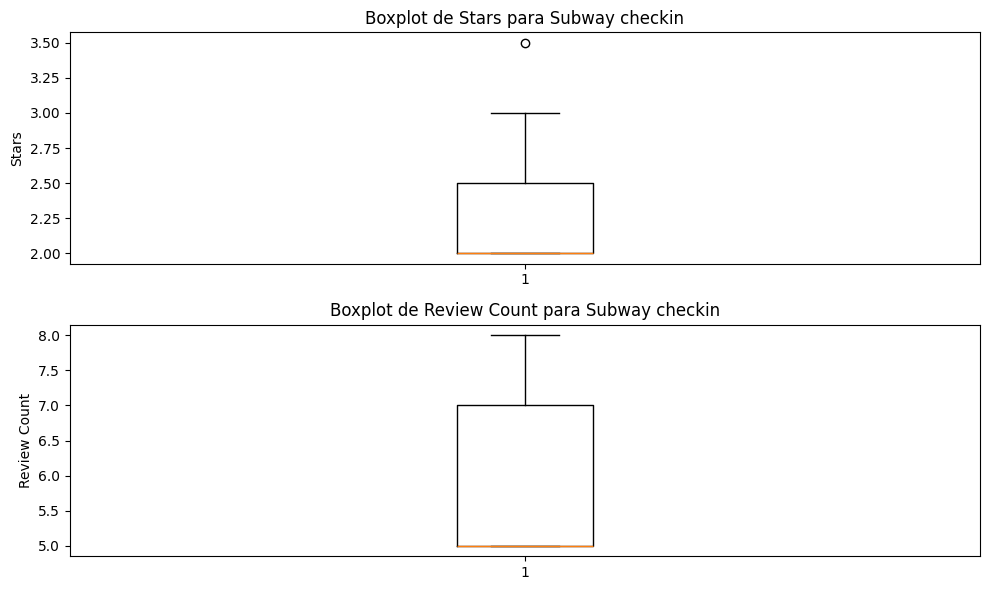

In [ ]:
subway_data_checkin = df_yelp_checkin[df_yelp_checkin['name']==('Subway')]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_data_checkin['stars'])
plt.title('Boxplot de Stars para Subway checkin')
plt.ylabel('Stars')

plt.subplot(2, 1, 2)
plt.boxplot(subway_data_checkin['review_count'])
plt.title('Boxplot de Review Count para Subway checkin')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_checkin[(df_yelp_checkin['name'] == 'Subway') & (df_yelp_checkin['stars'] == 3.5)]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
1712,Om6OwVsJ_t2XHQBYKnlcHg,Subway,10551 Kingsway Avenue,Edmonton,PA,T5H 4K1,53.557377,-113.502513,3.5,5,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '9:0-22:0', 'Monday': '9:0-22:0', '...",2019-09-09 02:37:26


Vamos a quitar todas aquellas categorias que solo se repiten una vez, pero primero vamos a recorrerlas para tener una noción de lo que tratan

In [ ]:
categorias = df_yelp_checkin['categories'].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:89]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")


Las menos repetidas son:
Kids Hair Salons: 1 veces
Packing Services: 1 veces
Spiritual Shop: 1 veces
Junk Removal & Hauling: 1 veces
Izakaya: 1 veces
Women's Clothing: 1 veces
Wholesale Stores: 1 veces
Bed & Breakfast: 1 veces
Adult Education: 1 veces
Tonkatsu: 1 veces
Pharmacy: 1 veces
Landscaping: 1 veces
Photographers: 1 veces
Golf Equipment: 1 veces
Movers: 1 veces
Recreation Centers: 1 veces
Historical Tours: 1 veces
Wine Tasting Room: 1 veces
Shaved Snow: 1 veces
Medical Spas: 1 veces
Scandinavian: 1 veces
Cosmetic Surgeons: 1 veces
Hair Removal: 1 veces
Home Cleaning: 1 veces
Car Share Services: 1 veces
Pop-up Shops: 1 veces
Dumplings: 1 veces
Cinema: 1 veces
Belgian: 1 veces
Hunting & Fishing Supplies: 1 veces
Airport Terminals: 1 veces
Yoga: 1 veces
Towing: 1 veces
Popcorn Shops: 1 veces
Wine Tasting Classes: 1 veces
Amusement Parks: 1 veces
Bar Crawl: 1 veces
Herbal Shops: 1 veces
Pet Sitting: 1 veces
Beer Tours: 1 veces
Office Cleaning: 1 veces
Head Shops: 1 veces
Bangladesh

Al ser obsoletas todos, prodecemos a su extracción

In [ ]:
categorias = df_yelp_checkin['categories'].str.split(', ').explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[frecuencia_categorias == 1].index.tolist()
def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(', ')
    categorias_filtradas = [categoria for categoria in categorias_lista if categoria not in categorias_solo_una_vez]
    return ', '.join(categorias_filtradas)
df_yelp_checkin['categories'] = df_yelp_checkin['categories'].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_checkin.head()

DataFrame modificado eliminando las categorías que se repiten solo una vez:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."
1,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,PA,37203,36.148371,-86.798895,3.5,159,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Friday': '7:0-17:0', 'Monday': '7:0-17:0', '...","2017-06-18 17:23:58, 2017-06-20 23:47:06, 2017..."
2,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.508780,5.0,20,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Friday': '10:0-20:0', 'Monday': '0:0-0:0', '...","2017-11-30 19:49:29, 2018-01-23 22:10:48, 2018..."
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,3173 Cypress Ridge Blvd,Wesley Chapel,PA,33544,28.196252,-82.380615,4.5,95,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Sports Bars, Bars, Lounges, Restauran...","{'Friday': '11:30-23:30', 'Monday': '11:30-22:...","2018-02-09 22:40:05, 2018-03-25 21:01:21, 2018..."
4,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,1001 Poydras St,New Orleans,PA,70112,29.950647,-90.074427,4.5,350,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Nightlife, Pubs, Event Planning & Services, Wi...","{'Friday': '11:0-23:0', 'Monday': '0:0-0:0', '...","2018-08-31 19:34:29, 2018-09-05 22:46:19, 2018..."


repetimos el mismo proceso parra **df_yelp_restaurantes**

In [ ]:
subway_rest_data = df_yelp_restaurantes.loc[df_yelp_restaurantes['name'] == 'Subway']

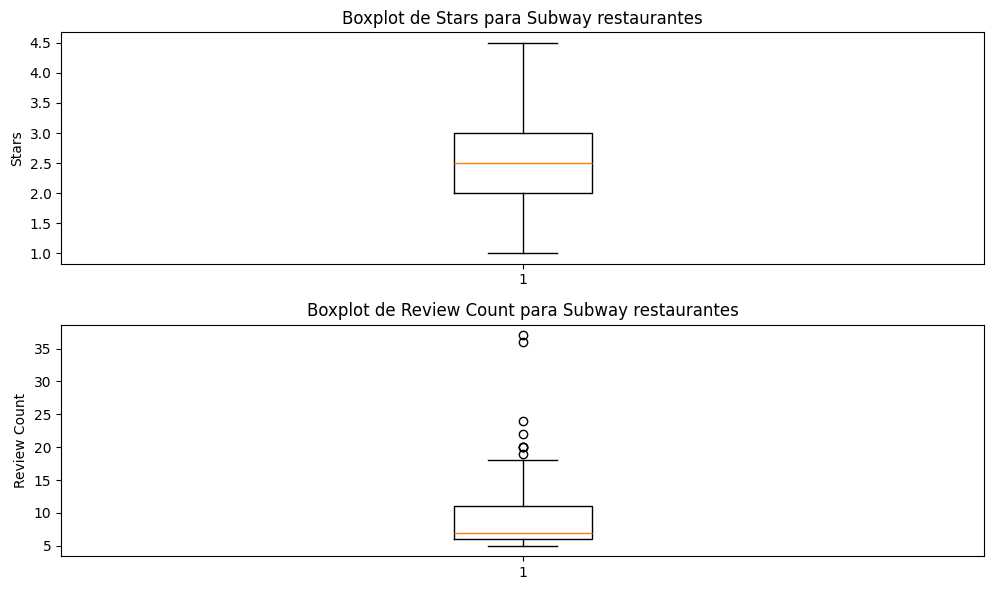

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_rest_data['stars'])
plt.title('Boxplot de Stars para Subway restaurantes')
plt.ylabel('Stars')

plt.subplot(2, 1, 2)
plt.boxplot(subway_rest_data['review_count'])
plt.title('Boxplot de Review Count para Subway restaurantes')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()

In [45]:
df_yelp_restaurantes[(df_yelp_restaurantes['name'] == 'Subway') & (df_yelp_restaurantes['review_count'] > 17)]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
13826,d-hMYlJ-hMAHSgd3KvYcWg,Subway,465 E Plumb Ln,Reno,FL,89511,39.506015,-119.797213,2.5,24,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Food Delivery Services, Restaurants, Delis, Sa...","{'Friday': '9:0-21:30', 'Monday': '9:0-21:30',..."
23139,CyctXClhoy8YamJjcE2ifg,Subway,5530 Telegraph Rd,St Louis,FL,63129,38.471225,-90.304188,1.5,22,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '10:30-19:0', 'Monday': '10:30-19:0..."
40209,lF7Zn9GNg0wMpM5g5kWdBw,Subway,5015 S Mccarran Blvd,Reno,CA,89502,39.477285,-119.783929,2.5,36,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sandwiches, Fast Food, Restaurants","{'Friday': '7:0-17:0', 'Monday': '0:0-0:0', 'S..."
40714,3p1gTXaVUKprXnzvhq7RRA,Subway,"5055 Sun Valley Blvd, Ste 300",Sun Valley,FL,89433,39.576861,-119.781463,2.0,19,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Restaurants, Sandwiches","{'Friday': '10:0-21:0', 'Monday': '10:0-20:30'..."
42625,An_QUi1YfPUf5kXJEgZMeQ,Subway,"5480 E Speedway Blvd, Ste C102",Tucson,FL,85712,32.235828,-110.875841,3.0,18,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '7:0-18:0', 'Monday': '0:0-0:0', 'S..."
47599,mwRqQENSKmBIGZEfWRzX5g,Subway,"6688 Nolensville Pike Rd, Ste 212",Brentwood,FL,37027,36.000563,-86.692133,1.5,20,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Fast Food, Sandwiches","{'Friday': '9:0-21:0', 'Monday': '0:0-0:0', 'S..."
53630,9_DJMSzn5PtMit78KFrwaw,Subway,237 N Peters,New Orleans,PA,70130,29.953171,-90.065352,2.5,18,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '9:0-18:30', 'Monday': '9:0-18:30',..."
66109,7e4PHzKqvtxcbxcXy6Jn3g,Subway,1151 S Kingshighway Blvd,St Louis,PA,63110,38.627035,-90.265107,2.5,20,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Sandwiches, Fast Food","{'Friday': '10:0-20:0', 'Monday': '10:0-20:0',..."
75582,2qg67Mq6cKjl1GPbls32Dg,Subway,"1131 Steamboat Pkwy, Ste 800",Reno,FL,89521,39.423295,-119.738617,3.0,37,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '10:0-19:0', 'Monday': '10:0-19:0',..."
75665,y98y26WYSZqYCLXH-uQRLA,Subway,909 Indiana Ave,Indianapolis,FL,46202,39.779847,-86.172692,2.0,20,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '9:30-22:0', 'Monday': '9:30-22:0',..."


Eliminacion de etiquetas de categoría obsoletos

In [ ]:
categorias = df_yelp_restaurantes['categories'].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:167]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")

Las menos repetidas son:
Kids Hair Salons: 1 veces
Packing Services: 1 veces
Drive-In Theater: 1 veces
Limos: 1 veces
Painters: 1 veces
Batting Cages: 1 veces
Spiritual Shop: 1 veces
Billing Services: 1 veces
Go Karts: 1 veces
Hiking: 1 veces
Pediatricians: 1 veces
Jails & Prisons: 1 veces
Tonkatsu: 1 veces
Landscaping: 1 veces
Grilling Equipment: 1 veces
Hindu Temples: 1 veces
Photographers: 1 veces
Used: 1 veces
Recording & Rehearsal Studios: 1 veces
Trampoline Parks: 1 veces
Dentists: 1 veces
CSA: 1 veces
Botanical Gardens: 1 veces
Carpet Cleaning: 1 veces
Soccer: 1 veces
Walking Tours: 1 veces
Damage Restoration: 1 veces
Oil Change Stations: 1 veces
Cabinetry: 1 veces
Colleges & Universities: 1 veces
Cosmetic Surgeons: 1 veces
Costumes: 1 veces
Outlet Stores: 1 veces
Tax Services: 1 veces
Rolfing: 1 veces
Weight Loss Centers: 1 veces
Threading Services: 1 veces
Trainers: 1 veces
Oral Surgeons: 1 veces
Oriental: 1 veces
Musicians: 1 veces
Visitor Centers: 1 veces
Hungarian: 1 veces


In [ ]:
categorias = df_yelp_restaurantes['categories'].str.split(', ').explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[frecuencia_categorias == 1].index.tolist()

def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(', ')
    categorias_filtradas = [categoria for categoria in categorias_lista if categoria not in categorias_solo_una_vez]
    return ', '.join(categorias_filtradas)

df_yelp_restaurantes['categories'] = df_yelp_restaurantes['categories'].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_restaurantes.head()


DataFrame modificado eliminando las categorías que se repiten solo una vez:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Food, Delis, Italian, Bakeries, Restaurants","{'Friday': '10:0-20:0', 'Monday': '10:0-18:0',..."
22,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,PA,46250,39.904320,-86.053080,4.0,20,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Steakhouses, Asian Fusion, Restaurants","{'Friday': '11:0-21:0', 'Monday': '11:0-21:0',..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Friday': '12:0-2:0', 'Monday': '16:0-0:0', '..."
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pizza, Chicken Wings, Sandwiches, Restaurants","{'Friday': '10:0-1:0', 'Monday': '10:0-0:0', '..."


Repetimos una vez mas el procedimiento pero esta vez con ***df_yelp_tips***

In [ ]:
subway_data_tips = df_yelp_tips[df_yelp_tips['name']== 'Subway']

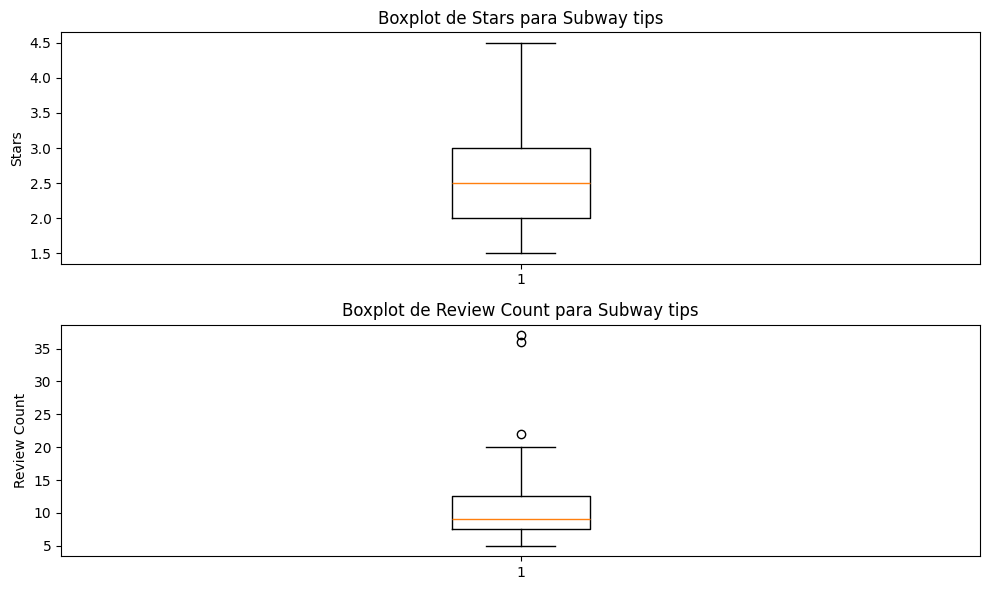

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(subway_data_tips['stars'])
plt.title('Boxplot de Stars para Subway tips')
plt.ylabel('Stars')

plt.subplot(2, 1, 2)
plt.boxplot(subway_data_tips['review_count'])
plt.title('Boxplot de Review Count para Subway tips')
plt.ylabel('Review Count')

plt.tight_layout()
plt.show()

In [ ]:
df_yelp_tips[(df_yelp_tips['name'] == 'Subway') & (df_yelp_tips['review_count'] > 20)]


,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
52635,orB78QDImDsusooQud9hFw,2qg67Mq6cKjl1GPbls32Dg,Wow! Such amazing customer service. Great job ...,2019-09-05 20:12:50,0,Subway,"1131 Steamboat Pkwy, Ste 800",Reno,FL,89521,39.423295,-119.738617,3.0,37,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Sandwiches, Fast Food","{'Friday': '10:0-19:0', 'Monday': '10:0-19:0',..."
59529,xHVwBmvuBEbmV0c4NU2Hwg,CyctXClhoy8YamJjcE2ifg,The old owner was horrible. The new owner is a...,2018-09-16 17:42:52,0,Subway,5530 Telegraph Rd,St Louis,FL,63129,38.471225,-90.304188,1.5,22,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Sandwiches, Restaurants","{'Friday': '10:30-19:0', 'Monday': '10:30-19:0..."
63459,HT6tAhRKfcrqRb9T118HEA,lF7Zn9GNg0wMpM5g5kWdBw,Long line...went very fast! All were friendly!,2017-04-26 19:18:47,0,Subway,5015 S Mccarran Blvd,Reno,CA,89502,39.477285,-119.783929,2.5,36,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Sandwiches, Fast Food, Restaurants","{'Friday': '7:0-17:0', 'Monday': '0:0-0:0', 'S..."


Una vez mas, repetimos el proceso en las categorías 

In [ ]:
categorias = df_yelp_tips['categories'].tolist()
categorias_separadas = [categoria.split(", ") for categoria in categorias]
todas_categorias = [item for sublist in categorias_separadas for item in sublist]
frecuencia_categorias = {categoria: todas_categorias.count(categoria) for categoria in set(todas_categorias)}
categorias_menos_comunes = sorted(frecuencia_categorias.items(), key=lambda x: x[1])
menos_repetidas = categorias_menos_comunes[:44]

print("Las menos repetidas son:")
for categoria, frecuencia in menos_repetidas:
    print(f"{categoria}: {frecuencia} veces")

Las menos repetidas son:
Packing Services: 1 veces
Limos: 1 veces
Spiritual Shop: 1 veces
Junk Removal & Hauling: 1 veces
Leisure Centers: 1 veces
Mass Media: 1 veces
Motorcycle Dealers: 1 veces
Photographers: 1 veces
Movers: 1 veces
Trampoline Parks: 1 veces
Web Design: 1 veces
Damage Restoration: 1 veces
Colleges & Universities: 1 veces
Playgrounds: 1 veces
Rolfing: 1 veces
Trainers: 1 veces
Kitchen Supplies: 1 veces
Car Share Services: 1 veces
Pop-up Shops: 1 veces
Counseling & Mental Health: 1 veces
Guns & Ammo: 1 veces
Fishing: 1 veces
Airport Terminals: 1 veces
Departments of Motor Vehicles: 1 veces
Popcorn Shops: 1 veces
Wine Tasting Classes: 1 veces
Herbal Shops: 1 veces
Radio Stations: 1 veces
Cultural Center: 1 veces
Contractors: 1 veces
Osteopaths: 1 veces
Gun/Rifle Ranges: 1 veces
Self Storage: 1 veces
Musical Instruments & Teachers: 1 veces
Guamanian: 1 veces
Nicaraguan: 1 veces
Medical Centers: 1 veces
Taxis: 1 veces
Building Supplies: 1 veces
Hospitals: 1 veces
Country D

In [ ]:
categorias = df_yelp_tips['categories'].str.split(', ').explode()

frecuencia_categorias = categorias.value_counts()

categorias_solo_una_vez = frecuencia_categorias[frecuencia_categorias == 1].index.tolist()

def filtrar_categorias(categoria_str):
    categorias_lista = categoria_str.split(', ')
    categorias_filtradas = [categoria for categoria in categorias_lista if categoria not in categorias_solo_una_vez]
    return ', '.join(categorias_filtradas)
df_yelp_tips['categories'] = df_yelp_tips['categories'].apply(filtrar_categorias)

print("DataFrame modificado eliminando las categorías que se repiten solo una vez:")
df_yelp_tips.head()

DataFrame modificado eliminando las categorías que se repiten solo una vez:


,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01 01:40:12,0,Oregano's,100 W Orange Grove Rd,Tucson,PA,85704,32.323157,-110.973652,3.5,385,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Italian, Pizza","{'Friday': '11:0-22:0', 'Monday': '0:0-0:0', '..."
1,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,The honey glazed salmon is amazing!,2018-01-14 15:00:01,0,Aksum Cafe,4630 Baltimore Ave,Philadelphia,PA,19143,39.948547,-75.216366,4.0,393,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Mediterranean, Vegetarian, American (New), Res...","{'Friday': '16:0-21:0', 'Monday': '0:0-0:0', '..."
2,IE0f4Mt6rfEw26pn598doA,aPD0HkuA7MXNhZZqXiGF4g,Great fish and chips!!,2017-09-30 22:39:11,0,McCreary's Irish Pub and Eatery,414 Main St,Franklin,PA,37064,35.924479,-86.870951,3.5,146,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pubs, Bars, Irish Pub, Irish, American (New), ...","{'Friday': '11:0-23:0', 'Monday': '11:0-22:0',..."
3,BrobnxoTkPml180NhXl6kw,zjLT8ELDYxxknQ9ZLrl6_w,Call ahead of time to make sure there isn't a ...,2017-03-18 18:22:28,0,Brunchery Restaurant & Catering,"3225 S MacDill Ave, Ste 109",Tampa,PA,33629,27.915901,-82.494764,3.5,274,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Caterers, Sandwiches, Burgers, Ev...","{'Friday': '7:0-14:0', 'Monday': '7:0-14:0', '..."
4,9XhCRgu_v7y-X2v4Av3HPA,fgnHM4VT-n1VjFL3YeBJsg,Ordered the pad Thai shrimp and it was good!,2017-08-29 17:12:23,0,Royal Thai Bistreaux,"1299 Hickory Ave, Ste A",Harahan,PA,70123,29.956544,-90.202459,4.5,171,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Thai, Restaurants","{'Friday': '16:30-21:30', 'Monday': None, 'Sat..."


A continuacion se revisará y corregirá en caso de ser necesario el tipo de dato de cada columna

In [ ]:
df_yelp_users.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,elite_len
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,14


In [ ]:
df_yelp_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99015 entries, 0 to 99014
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             99015 non-null  object 
 1   name                99015 non-null  object 
 2   review_count        99015 non-null  int64  
 3   yelping_since       99015 non-null  object 
 4   useful              99015 non-null  int64  
 5   funny               99015 non-null  int64  
 6   cool                99015 non-null  int64  
 7   elite               99015 non-null  object 
 8   friends             99015 non-null  object 
 9   fans                99015 non-null  int64  
 10  average_stars       99015 non-null  float64
 11  compliment_hot      99015 non-null  int64  
 12  compliment_more     99015 non-null  int64  
 13  compliment_profile  99015 non-null  int64  
 14  compliment_cute     99015 non-null  int64  
 15  compliment_list     99015 non-null  int64  
 16  comp

In [ ]:
df_yelp_checkin.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,date
0,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Friday': '16:0-19:0', 'Monday': '0:0-0:0', '...","2019-03-09 17:44:26, 2019-03-16 23:26:17, 2019..."


In [ ]:
df_yelp_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3330 entries, 0 to 3329
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   3330 non-null   object 
 1   name          3330 non-null   object 
 2   address       3330 non-null   object 
 3   city          3330 non-null   object 
 4   state         3330 non-null   object 
 5   postal_code   3330 non-null   object 
 6   latitude      3330 non-null   float64
 7   longitude     3330 non-null   float64
 8   stars         3330 non-null   float64
 9   review_count  3330 non-null   int64  
 10  is_open       3330 non-null   int64  
 11  attributes    3296 non-null   object 
 12  categories    3330 non-null   object 
 13  hours         3082 non-null   object 
 14  date          3330 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 390.4+ KB


In [ ]:
df_yelp_restaurantes.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."


In [ ]:
df_yelp_restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22685 entries, 3 to 150339
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   22685 non-null  object 
 1   name          22685 non-null  object 
 2   address       22685 non-null  object 
 3   city          22685 non-null  object 
 4   state         22685 non-null  object 
 5   postal_code   22685 non-null  object 
 6   latitude      22685 non-null  float64
 7   longitude     22685 non-null  float64
 8   stars         22685 non-null  float64
 9   review_count  22685 non-null  int64  
 10  is_open       22685 non-null  int64  
 11  attributes    22429 non-null  object 
 12  categories    22685 non-null  object 
 13  hours         19504 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.6+ MB


In [ ]:
df_yelp_tips.head(1)

,user_id,business_id,text,date,compliment_count,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1viszljzsa8W7VnYPuWosw,Zg83olSjsdXAhE5EEy5IcQ,Order crispy and they bake it up good.,2018-04-01 01:40:12,0,Oregano's,100 W Orange Grove Rd,Tucson,PA,85704,32.323157,-110.973652,3.5,385,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Italian, Pizza","{'Friday': '11:0-22:0', 'Monday': '0:0-0:0', '..."


In [ ]:
df_yelp_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69346 entries, 0 to 69345
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           69346 non-null  object 
 1   business_id       69346 non-null  object 
 2   text              69346 non-null  object 
 3   date              69346 non-null  object 
 4   compliment_count  69346 non-null  int64  
 5   name              69346 non-null  object 
 6   address           69346 non-null  object 
 7   city              69346 non-null  object 
 8   state             69346 non-null  object 
 9   postal_code       69346 non-null  object 
 10  latitude          69346 non-null  float64
 11  longitude         69346 non-null  float64
 12  stars             69346 non-null  float64
 13  review_count      69346 non-null  int64  
 14  is_open           69346 non-null  int64  
 15  attributes        69301 non-null  object 
 16  categories        69346 non-null  object

In [ ]:
df_yelp_reviews.head(3)

,review_id,user_id,business_id,stars,funny,cool,text,date
0,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
1,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,0,1,I was really between 3 and 4 stars for this on...,2018-07-17 03:30:07
2,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,0,1,Great staff always helps and always nice. Alwa...,2017-05-26 13:10:24


In [ ]:
df_yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558655 entries, 0 to 558654
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    558655 non-null  object
 1   user_id      558655 non-null  object
 2   business_id  558655 non-null  object
 3   stars        558655 non-null  int8  
 4   funny        558655 non-null  int8  
 5   cool         558655 non-null  int8  
 6   text         558655 non-null  object
 7   date         558655 non-null  object
dtypes: int8(3), object(5)
memory usage: 22.9+ MB


Los formatos se encuentran en su mayoria en el estado correcto, se harán los siguientes cambios
- ### df_yelp_checkin, df_yelp_restaurantes df_yelp_tips:
 Se cambia el formato de la columna *is_open* de Entero a Booleano puesto sus datos eran 1 y 0
 - ### df_yelp_users, df_yelp_reviews: 
 En las columnas *yelping_since* (referencia a la fecha de creción del usuario) y *date* (referencia de la fecha de posteo de la reseña) se les quita la hora puesto que es un dato obsoleto y se cambia su formato a Datetime

In [ ]:
df_yelp_checkin['is_open'] = df_yelp_checkin['is_open'].astype(bool)
df_yelp_restaurantes['is_open'] = df_yelp_restaurantes['is_open'].astype(bool)
df_yelp_tips['is_open'] = df_yelp_tips['is_open'].astype(bool)

In [ ]:
df_yelp_users['yelping_since'] = pd.to_datetime(df_yelp_users['yelping_since'])
df_yelp_reviews['date'] = pd.to_datetime(df_yelp_reviews['date'])
df_yelp_reviews['date'] = df_yelp_reviews['date'].dt.date

A continuación revisaremos las latitudes y longitudes de los dataframes, con la ayuda de geopandas

En ambos casos (df_yelp_restaurantes y df_yelp_tips) encontramos que hay datos que corresponden a una ciudad de Canadá, datos que serán extraidos


In [ ]:
df_yelp_restaurantes.head(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,True,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."


C:\Users\OS\AppData\Local\Temp\ipykernel_11460\262260019.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


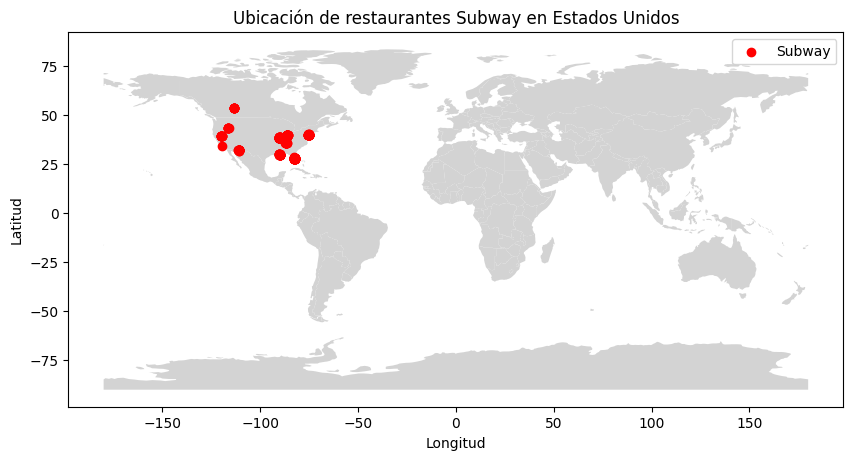

In [ ]:
subway_df_rest = df_yelp_restaurantes[df_yelp_restaurantes['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df_rest['longitude'], subway_df_rest['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [ ]:
df_yelp_restaurantes = df_yelp_restaurantes.drop(df_yelp_restaurantes[(df_yelp_restaurantes['latitude'] > 50)].index)


C:\Users\OS\AppData\Local\Temp\ipykernel_11460\3937776555.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


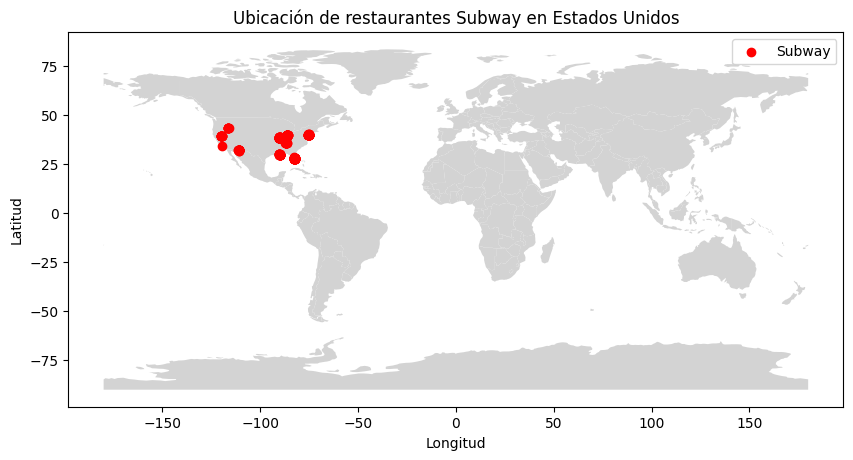

In [ ]:
subway_df = df_yelp_restaurantes[df_yelp_restaurantes['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df['longitude'], subway_df['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

C:\Users\OS\AppData\Local\Temp\ipykernel_11460\2312680780.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


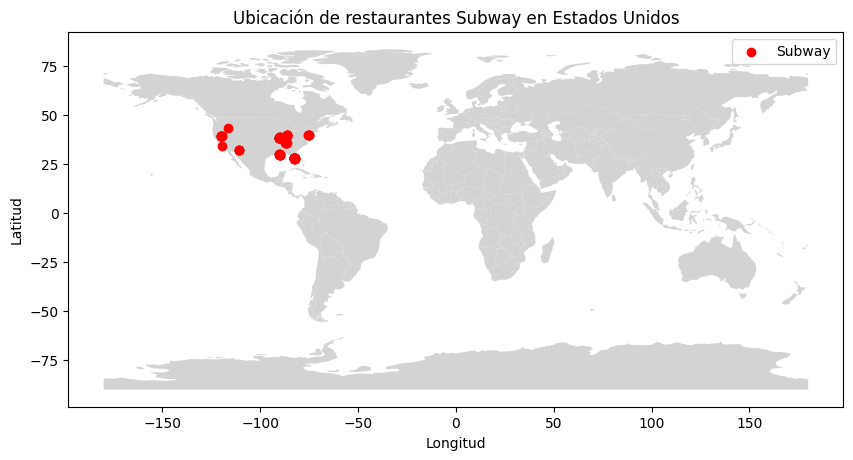

In [ ]:
subway_df_tips = df_yelp_tips[df_yelp_tips['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df_tips['longitude'], subway_df_tips['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()

In [ ]:
df_yelp_tips = df_yelp_tips.drop(df_yelp_tips[(df_yelp_tips['latitude'] > 50)].index)

C:\Users\OS\AppData\Local\Temp\ipykernel_20972\2312680780.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


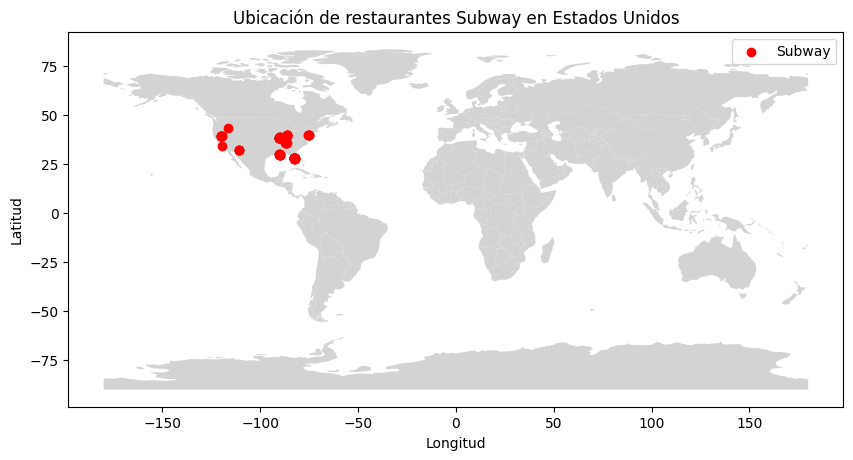

In [ ]:
subway_df_tips = df_yelp_tips[df_yelp_tips['name']== 'Subway']
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
usa.plot(ax=ax, color='lightgrey')
ax.scatter(subway_df_tips['longitude'], subway_df_tips['latitude'], color='red', label='Subway')
plt.title('Ubicación de restaurantes Subway en Estados Unidos')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.show()